In [2]:
try:
    import tangelo
except ModuleNotFoundError:
    !pip install git+https://github.com/goodchemistryco/Tangelo.git@develop  --quiet
    !pip install pyscf
    !pip install qulacs qiskit qiskit-aer  

  Using cached pyscf-2.6.2-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
Using cached pyscf-2.6.2-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (48.6 MB)
  Using cached qulacs-0.6.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached qiskit-1.2.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_aer-0.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
  Using cached rustworkx-0.15.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.9 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.3.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached symengine-0.11.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (1.2 kB)
  Using cached pbr-6.1.0-py2.py3-none-any.whl.metadata (3.4 kB)
Using cached qulacs-0.6.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl

In [3]:
from tangelo import SecondQuantizedMolecule

LiH = [('Li', (0, 0, 0)),('H', (0, 0, 1.5949))] #these triples refer to coordinates
# the 1.5949 is experimentally determined to be the space betwn the elements
#see here for example https://cccbdb.nist.gov/expgeom2x.asp?casno=1333740
#use frozen_orbitals = None to set everything active for calculations
mol_LiH = SecondQuantizedMolecule(LiH, q=0, spin=0, basis="sto-3g")

# triples can be made using spin #, abs diff between alpha and beta electrons
#alpha = spin up, beta = spin-down
#spin = alpha - beta electrons, 2 electrons make alpha(it seems) beta is single 
#electron occupying an orbital
mol_LiH_t = SecondQuantizedMolecule(LiH, q=0, spin=2, basis="sto-3g")


In [4]:
#Recieve visualization of the molecule for verification

#there should be 6 spin orbitals, which can hold a max of 2 electrons
#2 are occupied, with one active and one frozen and should have 4
#total electrons

# Note, frozen orbitals mean that some electrons are treated as fixed
# so if one orbital is frozen => only 2 electrons get qbits as opposed to 
#others in the frozen orbital

#mo_occ parameter tells use where our electrons are!
print(mol_LiH) # 2, 2 split between 0 and 1 oribtals
print(mol_LiH_t) # 2,1,1 splits between 0
print(mol_LiH.n_mos, mol_LiH.n_sos)

SecondQuantizedMolecule(xyz=[('Li', (0.0, 0.0, 0.0)), ('H', (0.0, 0.0, 1.5949))], q=0, spin=0, solver=<tangelo.toolboxes.molecular_computation.integral_solver_pyscf.IntegralSolverPySCF object at 0x781763ad0f10>, n_atoms=2, n_electrons=4, basis='sto-3g', ecp={}, symmetry=False, uhf=False, mf_energy=-7.862026959394135, mo_energies=array([-2.34864417, -0.28570476,  0.07826185,  0.16393842,  0.16393842,
        0.54912925]), mo_occ=array([2., 2., 0., 0., 0., 0.]), n_mos=6, n_sos=12, active_occupied=[1], frozen_occupied=[0], active_virtual=[2, 3, 4, 5], frozen_virtual=[])
SecondQuantizedMolecule(xyz=[('Li', (0.0, 0.0, 0.0)), ('H', (0.0, 0.0, 1.5949))], q=0, spin=2, solver=<tangelo.toolboxes.molecular_computation.integral_solver_pyscf.IntegralSolverPySCF object at 0x78175cf097d0>, n_atoms=2, n_electrons=4, basis='sto-3g', ecp={}, symmetry=False, uhf=False, mf_energy=-7.766133365335711, mo_energies=NPArrayWithTag([-2.34705371, -0.26589778,  0.01337911,  0.16088823,
                 0.16088823

In [5]:
from tangelo.algorithms import FCISolver, CCSDSolver

#Classical energy calculations using FCI and CCSD
#FCI = bad scale good acc, CCSD = good scale worse acc
fci_solver = FCISolver(mol_LiH)
fci_energy = fci_solver.simulate()

print(f"LiH FCI Groud State Energy: {fci_energy}")

ccsd_solver = CCSDSolver(mol_LiH)
ccsd_energy = ccsd_solver.simulate()
print(f"LiH CCSD Groud State Energy: {ccsd_energy}")
print(f"Percent difference of FCI and CCSD: {100*(fci_energy-ccsd_energy)/fci_energy}%\n")

LiH FCI Groud State Energy: -7.882175990801267
LiH CCSD Groud State Energy: -7.882175990941341
Percent difference of FCI and CCSD: -1.777094682432329e-09%



In [6]:
# Do the same for the excited LiH
fci_solver_t = FCISolver(mol_LiH_t)
fci_energy_t = fci_solver_t.simulate()

print(f"LiH FCI First Excited State Energy: {fci_energy_t}")

ccsd_solver_t = CCSDSolver(mol_LiH_t)
ccsd_energy_t = ccsd_solver_t.simulate()
print(f"LiH CCSD First Excited State Energy: {ccsd_energy_t}")
print(f"Percent difference of FCI and CCSD: {100*(fci_energy_t-ccsd_energy_t)/fci_energy_t}%")

## Notice that the value here might be different from literatures.

LiH FCI First Excited State Energy: -7.766133365335711
LiH CCSD First Excited State Energy: -7.766133365335711
Percent difference of FCI and CCSD: -0.0%


In [12]:
#Implement a VQE Energy solver
from tangelo.algorithms import VQESolver
from tangelo.algorithms import BuiltInAnsatze as Ansatze

#100 cycles for speed's sake
vqe_options = {"molecule": mol_LiH, "verbose": True, "ansatz": Ansatze.QCC, "up_then_down": True}

vqe_solver = VQESolver(vqe_options)
vqe_solver.build()
print(vqe_solver.ansatz.circuit)
vqe_energy = vqe_solver.simulate()

print(f"\nVQE Ground State Energy: {vqe_energy}")
print(f"Percent difference of FCI and VQE: {100*(fci_energy-vqe_energy)/fci_energy}%")

#print("VQE Ground State Energy using Ansatze.UCCSD: -7.882390470334529\nPercent difference of FCI and VQE: 0.00016416314034363796%")

Circuit object. Size 110 

RX        target : [0]   parameter : 3.141592653589793	 (variational)
RX        target : [1]   parameter : 0.0	 (variational)
RX        target : [2]   parameter : 0.0	 (variational)
RX        target : [3]   parameter : 0.0	 (variational)
RX        target : [4]   parameter : 0.0	 (variational)
RX        target : [5]   parameter : 3.141592653589793	 (variational)
RX        target : [6]   parameter : 0.0	 (variational)
RX        target : [7]   parameter : 0.0	 (variational)
RX        target : [8]   parameter : 0.0	 (variational)
RX        target : [9]   parameter : 0.0	 (variational)
RZ        target : [0]   parameter : 0.0	 (variational)
RZ        target : [1]   parameter : 0.0	 (variational)
RZ        target : [2]   parameter : 0.0	 (variational)
RZ        target : [3]   parameter : 0.0	 (variational)
RZ        target : [4]   parameter : 0.0	 (variational)
RZ        target : [5]   parameter : 0.0	 (variational)
RZ        target : [6]   parameter : 0.0	 (variat

In [13]:
# Excited state version
### NOTICE: the VQESolver that takes the first excited state that was defined above cannot use the default Ansatze.UCCSD to generate the ansatz circuit.
###         The circuit initializes the first excited quantum state as "1010000000" and nothing else, but other ansatzes append an actual ansatz circuit.
###         Don't know if this is a problem of our setup or a feature of UCCSD.

vqe_options_t = {"molecule": mol_LiH_t, "verbose": True, "ansatz": Ansatze.QMF, "qubit_mapping": 'scbk', "up_then_down": True} 
## A different ansatz to avoid generating empty ansatz circuit

vqe_solver_t = VQESolver(vqe_options_t)
vqe_solver_t.build()
print(vqe_solver_t.ansatz.circuit)
vqe_energy_t = vqe_solver_t.simulate()

print(f"\nVQE First Excited State Energy: {vqe_energy_t}")
print(f"Percent difference of FCI and VQE: {100*(fci_energy_t-vqe_energy_t)/fci_energy_t}%")

#print("VQE First Excited State Energy: -7.7661333653357065\nPercent difference of FCI and VQE: 1.1436558940186715e-13%")

Circuit object. Size 16 

RX        target : [0]   parameter : 3.141592653589793	 (variational)
RX        target : [1]   parameter : 0.0	 (variational)
RX        target : [2]   parameter : 0.0	 (variational)
RX        target : [3]   parameter : 0.0	 (variational)
RX        target : [4]   parameter : 0.0	 (variational)
RX        target : [5]   parameter : 0.0	 (variational)
RX        target : [6]   parameter : 0.0	 (variational)
RX        target : [7]   parameter : 0.0	 (variational)
RZ        target : [0]   parameter : 0.0	 (variational)
RZ        target : [1]   parameter : 0.0	 (variational)
RZ        target : [2]   parameter : 0.0	 (variational)
RZ        target : [3]   parameter : 0.0	 (variational)
RZ        target : [4]   parameter : 0.0	 (variational)
RZ        target : [5]   parameter : 0.0	 (variational)
RZ        target : [6]   parameter : 0.0	 (variational)
RZ        target : [7]   parameter : 0.0	 (variational)

	Energy = -7.7661334 
	Energy = -7.7661334 
	Energy = -7.766133

In [8]:
from pprint import pprint
pprint(vars(vqe_solver))

{'ansatz': <tangelo.toolboxes.ansatz_generator.uccsd.UCCSD object at 0x7babd89665d0>,
 'ansatz_options': {},
 'backend': <tangelo.linq.target.target_qulacs.QulacsSimulator object at 0x7babd878c690>,
 'backend_options': {'n_shots': None, 'noise_model': None, 'target': None},
 'builtin_ansatze': {<BuiltInAnsatze.UCC3: <tangelo.toolboxes.ansatz_generator.rucc.RUCC object at 0x7babe2237510>>,
                     <BuiltInAnsatze.HEA: <class 'tangelo.toolboxes.ansatz_generator.hea.HEA'>>,
                     <BuiltInAnsatze.QMF: <class 'tangelo.toolboxes.ansatz_generator.qmf.QMF'>>,
                     <BuiltInAnsatze.UCCGD: <class 'tangelo.toolboxes.ansatz_generator.uccgd.UCCGD'>>,
                     <BuiltInAnsatze.UCCSD: <class 'tangelo.toolboxes.ansatz_generator.uccsd.UCCSD'>>,
                     <BuiltInAnsatze.ILC: <class 'tangelo.toolboxes.ansatz_generator.ilc.ILC'>>,
                     <BuiltInAnsatze.VSQS: <class 'tangelo.toolboxes.ansatz_generator.vsqs.VSQS'>>,
           

In [14]:
#tangelo implements trotter suzuki time evolution
#we can use that module to do things, but we need to find
#the qubit hamiltonian of our molecule
#Steps: get hamiltonian, build Trotter circuit, simulate circuit in diff ways
#(noisy, noiseless, quantum machine hardware, etc.)
from tangelo.toolboxes.unitary_generator.trotter_suzuki import TrotterSuzukiUnitary

NUM_STEPS = 1 ##Try the smallest time step possible; expect to see the evolution of quantum state being nearly the same as the original state.

LiH_gnd_hamiltonian = vqe_solver.qubit_hamiltonian
ts_model = TrotterSuzukiUnitary(qubit_hamiltonian=LiH_gnd_hamiltonian)
ts_circuit = ts_model.build_circuit(NUM_STEPS)



In [11]:
#we now need to do a simulation of our trotter suzuki circuit
print(ts_circuit)
ts_circuit.draw()


Circuit object. Size 3965 

RZ        target : [0]   parameter : -17.294535534699687
RX        target : [0]   parameter : 1.5707963267948966
RX        target : [2]   parameter : 1.5707963267948966
CNOT      target : [1]   control : [0]   
CNOT      target : [2]   control : [1]   
RZ        target : [2]   parameter : 12.203436533709294
CNOT      target : [2]   control : [1]   
CNOT      target : [1]   control : [0]   
RX        target : [2]   parameter : -1.5707963267948966
RX        target : [0]   parameter : -1.5707963267948966
H         target : [0]   
H         target : [2]   
CNOT      target : [1]   control : [0]   
CNOT      target : [2]   control : [1]   
RZ        target : [2]   parameter : 12.203436533709294
CNOT      target : [2]   control : [1]   
CNOT      target : [1]   control : [0]   
H         target : [2]   
H         target : [0]   
RX        target : [0]   parameter : 1.5707963267948966
RX        target : [8]   parameter : 1.5707963267948966
CNOT      target : [1]   

KeyboardInterrupt: 

In [15]:
# Try to run circuit simulations with/without noises on backend
from tangelo.linq import get_backend, ONE_QUBIT_GATES, TWO_QUBIT_GATES
from tangelo.linq.noisy_simulation import NoiseModel

# Get the optimal circuit
optimal_circuit = vqe_solver.optimal_circuit

# Create a noise model to be used
nm = NoiseModel()
for g in ONE_QUBIT_GATES:
    nm.add_quantum_error(g, 'pauli', [1/4]*3)
nm.add_quantum_error('CNOT', 'pauli', [1., 0., 0.])
nm.add_quantum_error('CNOT', 'depol', 0.72)

# Get backends with noisy or noiseless 
#noisy_backend = get_backend(target='qulacs', n_shots=10**6, noise_model=nm)
noisless_backend = get_backend(target='qulacs')

# Simulate
#print(noisy_backend.simulate(optimal_circuit))
print(noisless_backend.simulate(optimal_circuit))


({'1000010000': 0.9802374731240694, '1100110000': 4.502533949474159e-05, '0100001000': 0.0004308966013315395, '0000101000': 0.0023800667122140487, '0010000100': 0.0006330361654859, '0110100100': 2.9077309371383798e-08, '1110011100': 2.7827249998766284e-07, '1010111100': 1.5370441820580292e-06, '0001000010': 0.0006330361479002494, '0101100010': 2.907730856362045e-08, '1101011010': 2.782724922572941e-07, '1001111010': 1.537044139359171e-06, '1011010110': 4.0881397280556526e-07, '0111001110': 1.797080363570902e-10, '0011101110': 9.926212319362643e-10, '0100000001': 0.0023800667279591935, '0000100001': 0.013167524855978495, '1000011001': 4.502533929015354e-05, '1100111001': 2.3573846776559925e-05, '1110010101': 1.5370441922262254e-06, '1010110101': 8.503571504161283e-06, '0010001101': 2.9077309239261055e-08, '0110101101': 1.5223961517840076e-08, '1101010011': 1.537044149527367e-06, '1001110011': 8.503571267933337e-06, '0001001011': 2.9077308431497753e-08, '0101101011': 1.522396109492069e-0

({'1000010000': 0.9809841637783695, '0100010000': 0.0014916707916922177, '0000110000': 0.0028816214544963342, '1100110000': 4.398923024028197e-05, '1000001000': 0.0017993408722382378, '0100001000': 0.0003861003998973153, '0000101000': 0.0012893818040946065, '1100101000': 5.274997995029588e-08, '0010000100': 0.0005092052237651215, '1110000100': 1.2725835002381456e-08, '1010100100': 1.6212268608204715e-08, '0110100100': 8.137238436484269e-08, '0010011100': 1.2178287968270466e-08, '1110011100': 2.413855495076425e-07, '1010111100': 1.8162964326927822e-06, '0110111100': 2.475907155803048e-09, '0001000010': 0.0005046593236046758, '1101000010': 1.5183364096982216e-08, '1001100010': 1.5426773303627083e-08, '0101100010': 8.019786787162175e-08, '0001011010': 1.516875922457966e-08, '1101011010': 2.4124861645204256e-07, '1001111010': 1.867321486761004e-06, '0101111010': 1.2074235022595243e-09, '1011010110': 3.4061987730782635e-07, '0111010110': 4.423645086544767e-10, '0011110110': 3.05712818039252

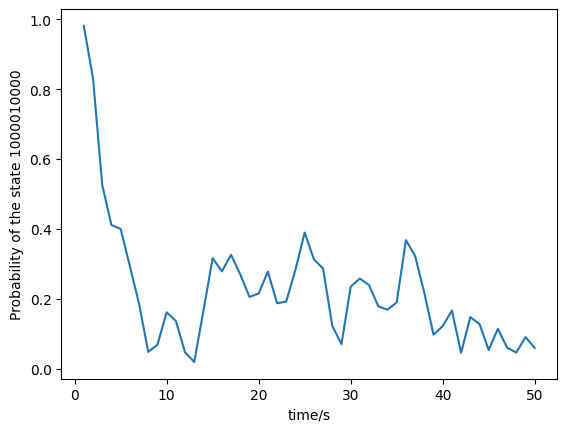

In [19]:
# Indeed, when t is small (default time = 1.0 * NUM_STEPS = 1 = 1.0 second) in the time evolution, energy (quantum states) change is minimal:
most_probable_state = "1000010000" # depends on your qubit_mapping setting. Here I used "srbk" so it is 1000010000 instead of 1100000000.
print(noisless_backend.simulate(optimal_circuit+ts_circuit))
print(f'\nProbability of finding ground state: {noisless_backend.simulate(optimal_circuit)[0][most_probable_state]}')
print(f'Probability of finding ground state after 1 second: {noisless_backend.simulate(optimal_circuit+ts_circuit)[0][most_probable_state]} \n')
from matplotlib import pyplot as plt

## Can we see how it evolves? Let's try by plotting how the probability of the 1100000000 initial state changes:
def plot_state_prob_evolve(state):   
    t_array = range(1,51)
    p_array = []
    for i in t_array:
        ts = TrotterSuzukiUnitary(qubit_hamiltonian=LiH_gnd_hamiltonian).build_circuit(i)
        p_array.append(noisless_backend.simulate(optimal_circuit+ts)[0][state])
    plt.plot(t_array,p_array)
    plt.xlabel("time/s")
    plt.ylabel(f"Probability of the state {state}")
    
# state = '1100000000'
plot_state_prob_evolve(most_probable_state)

## Calculating the energy from the state probability (naive guessing); TODO: look into how energy connects with the mapping used.
def cal_energy_from_prob(molecular_energies, probabilities):
    energy = 0
    for prob_key, prob_value in probabilities.items():
        j = 0
        temp = 0
        # print(prob_key)
        while j < len(prob_key)/2:
            if prob_key[2*j] == "1":
                temp += molecular_energies[j]
                # print(j)
            if prob_key[2*j+1] == "1":
                temp += molecular_energies[j]
                # print(j)
            j += 1
        energy += temp * prob_value

    return energy
    
# print(f'Valence electron energy: {cal_energy_from_prob(mol_LiH.mo_energies, noisless_backend.simulate(optimal_circuit)[0])}')
# print(f'Valence electron energy after 1 second: {cal_energy_from_prob(mol_LiH.mo_energies, noisless_backend.simulate(optimal_circuit+TrotterSuzukiUnitary(qubit_hamiltonian=LiH_gnd_hamiltonian).build_circuit(1))[0])}')

# energy_array = []
# time_array = range(1,51)
# cal_energy_from_prob(mol_LiH.mo_energies, noisless_backend.simulate(optimal_circuit+TrotterSuzukiUnitary(qubit_hamiltonian=LiH_gnd_hamiltonian).build_circuit(time_array))[0])

In [59]:
# Try different Mappings
from tangelo.algorithms import BuiltInAnsatze as Ansatze
# VQE-UCCSD on LiH with different qubit mappings
for qm in ['jw', 'bk', 'scbk']:
    vqe1_options = {"molecule": mol_LiH, "ansatz": Ansatze.UCCSD, "up_then_down": True, "qubit_mapping": qm}
    vqe1_solver = VQESolver(vqe1_options)
    vqe1_solver.build()
    vqe1_solver.simulate()
    print(f"VQE Ground State Energy: {vqe1_solver.optimal_energy}")
    print(f"Percent difference of FCI and VQE: {100*(fci_energy-vqe1_solver.optimal_energy)/fci_energy}%")
    print("\n", vqe1_solver.get_resources(), "\n")

VQE Ground State Energy: -7.882174298862938
Percent difference of FCI and VQE: 2.1465371111762914e-05%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 1985, 'circuit_2qubit_gates': 1616, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 

VQE Ground State Energy: -7.882172112665051
Percent difference of FCI and VQE: 4.9201340078625605e-05%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 1834, 'circuit_2qubit_gates': 1442, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 

VQE Ground State Energy: -7.88217087757367
Percent difference of FCI and VQE: 6.487076160144008e-05%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 8, 'circuit_depth': 1660, 'circuit_2qubit_gates': 1276, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 



In [49]:
# Try different Ansatz ('jw' as the mapping; HEA isn't compatible with 'jw')
from tangelo.algorithms import BuiltInAnsatze as Ansatze
for az in [Ansatze.UCCSD, Ansatze.ILC, Ansatze.QCC, Ansatze.QMF]:
    vqe2_options = {"molecule": mol_LiH, "ansatz": az, "up_then_down": True, "qubit_mapping": 'jw'}
    vqe2_solver = VQESolver(vqe2_options)
    vqe2_solver.build()
    vqe2_solver.simulate()
    print(f"VQE Ground State Energy: {vqe2_solver.optimal_energy}")
    print(f"Percent difference of FCI and VQE: {100*(fci_energy-vqe2_solver.optimal_energy)/fci_energy}%")
    print("\n", vqe2_solver.get_resources(), "\n")


VQE Ground State Energy: -7.882174298862267
Percent difference of FCI and VQE: 2.1465379619244953e-05%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 1985, 'circuit_2qubit_gates': 1616, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 

VQE Ground State Energy: -7.881746411660296
Percent difference of FCI and VQE: 0.005450006971065299%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 133, 'circuit_2qubit_gates': 98, 'circuit_var_gates': 31, 'vqe_variational_parameters': 26} 

VQE Ground State Energy: -7.88149016642243
Percent difference of FCI and VQE: 0.008700952371991035%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 56, 'circuit_2qubit_gates': 36, 'circuit_var_gates': 26, 'vqe_variational_parameters': 26} 

VQE Ground State Energy: -7.862026959394113
Percent difference of FCI and VQE: 0.2556277788096563%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 2, 'circuit_2qubit_g

In [13]:
# Try different Ansatz ('bk' as map)
for az in [Ansatze.UCCSD, Ansatze.ILC, Ansatze.QCC, Ansatze.QMF]:
    vqe3_options = {"molecule": mol_LiH, "ansatz": az, "up_then_down": True, "qubit_mapping": 'bk'}
    vqe3_solver = VQESolver(vqe3_options)
    vqe3_solver.build()
    vqe3_solver.simulate()
    print(f"VQE Ground State Energy: {vqe3_solver.optimal_energy}")
    print(f"Percent difference of FCI and VQE: {100*(fci_energy-vqe3_solver.optimal_energy)/fci_energy}%")
    print("\n", vqe3_solver.get_resources(), "\n")

# 'bk' mapping seems to be a little better for the default setting of UCCSD, but for ILC and QCC it depends on whether "up_then_down" is False.
# ILC and QCC provide the best balance between accuracy and circuit complexity compared to other ansatzes no matter the mapping used.

VQE Ground State Energy: -7.882172112674606
Percent difference of FCI and VQE: 4.920121891179857e-05%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 1834, 'circuit_2qubit_gates': 1442, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 

VQE Ground State Energy: -7.8817464116602896
Percent difference of FCI and VQE: 0.0054500069712005135%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 127, 'circuit_2qubit_gates': 92, 'circuit_var_gates': 31, 'vqe_variational_parameters': 26} 

VQE Ground State Energy: -7.881490166422676
Percent difference of FCI and VQE: 0.008700952368926084%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 64, 'circuit_2qubit_gates': 44, 'circuit_var_gates': 26, 'vqe_variational_parameters': 26} 

VQE Ground State Energy: -7.862026959394125
Percent difference of FCI and VQE: 0.25562777880955473%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 2, 'circuit_2qubi

In [15]:
# Try different Ansatz ('scbk' as the mapping, which strictly requires "up_then_down" = True)
from tangelo.algorithms import BuiltInAnsatze as Ansatze
for az in [Ansatze.UCCSD, Ansatze.ILC, Ansatze.QCC, Ansatze.QMF]:
    vqe3_options = {"molecule": mol_LiH, "ansatz": az, "up_then_down": True, "qubit_mapping": 'scbk'}
    vqe3_solver = VQESolver(vqe3_options)
    vqe3_solver.build()
    vqe3_solver.simulate()
    print(f"VQE Ground State Energy: {vqe3_solver.optimal_energy}")
    print(f"Percent difference of FCI and VQE: {100*(fci_energy-vqe3_solver.optimal_energy)/fci_energy}%")
    print("\n", vqe3_solver.get_resources(), "\n")

## We can conclude that the specific mapping should be tuned for each circuit, but the choice of Ansatze matters the most.
## UCCSD is the most accurate (10^-5 %) one but produces the most complex circuit.
## ILC and QCC have a good balance (10^-3 %), though each might favor different mappings depending on the circuit.
## VQE produces the least complex circuit with a slightly higher relative relative error (10^-1 %).
    
## TODO: Quantify the accuracy and circuit simplicity we aim for.

VQE Ground State Energy: -7.882170877578321
Percent difference of FCI and VQE: 6.487070265754792e-05%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 8, 'circuit_depth': 1660, 'circuit_2qubit_gates': 1276, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 

VQE Ground State Energy: -7.881746411660279
Percent difference of FCI and VQE: 0.005450006971335732%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 8, 'circuit_depth': 129, 'circuit_2qubit_gates': 94, 'circuit_var_gates': 27, 'vqe_variational_parameters': 22} 

VQE Ground State Energy: -7.881490166423446
Percent difference of FCI and VQE: 0.008700952359156565%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 8, 'circuit_depth': 64, 'circuit_2qubit_gates': 44, 'circuit_var_gates': 22, 'vqe_variational_parameters': 22} 

VQE Ground State Energy: -7.862026959394125
Percent difference of FCI and VQE: 0.25562777880955473%

 {'qubit_hamiltonian_terms': 276, 'circuit_width': 8, 'circuit_depth': 2, 'circuit_2qubit_gate